In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from warnings import filterwarnings
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

filterwarnings('ignore')

%store -r df

res = df[~((df.duplicated(['session_id'])) & (df['target_event']==0) )]
res = res.sample(n=200000).reset_index(drop=True)

In [2]:
def view_occupancy(df):
    length = len(df)
    dic = dict()
    for col in df.columns:
        percent_filled = (length-df[col].isna().sum())/length
        dic[col] = percent_filled

    dic = sorted(dic.items(), key=lambda x: x[1], reverse=True)
    for k, v in dic:
        print('{}: {:.3f}%, {}'.format(k, v*100, df[k].isna().sum()))

view_occupancy(res)

session_id: 100.000%, 0
client_id: 100.000%, 0
visit_date: 100.000%, 0
visit_time: 100.000%, 0
visit_number: 100.000%, 0
utm_medium: 100.000%, 0
device_category: 100.000%, 0
device_screen_resolution: 100.000%, 0
device_browser: 100.000%, 0
geo_country: 100.000%, 0
geo_city: 100.000%, 0
target_event: 100.000%, 0
utm_source: 99.996%, 8
utm_campaign: 88.587%, 22826
utm_adcontent: 82.391%, 35218
device_brand: 79.864%, 40272
device_os: 41.178%, 117644
utm_keyword: 40.789%, 118422
device_model: 0.901%, 198198


In [3]:
for col in res.columns:
    res[col] = res[col].fillna('unknown')
tmp = res.copy()
    
drop_features=['session_id', 'client_id', 'visit_number', 'device_model', 'device_screen_resolution', 'utm_keyword']# 'visit_time'
res = res.drop(drop_features, axis=1)

In [4]:
best_brands = ['Samsung', 'Xiaomi', 'Huawei', 'POCO']

dev_types = ['mobile', 'tablet']

android_brands = ['Xiaomi', 'Samsung', 'Huawei', 'Vivo', 'LG',
       'BQ', 'OnePlus', 'itel', 'Asus', 'Sony', 'Android', 'OPPO',
       'Nokia', 'Realme', 'Alcatel', 'Infinix', 'Micromax', 'Blackview',
       'Oukitel', 'ZTE', 'Motorola', 'HOMTOM', 'Google', 'Lenovo',
       'China Phone', 'Neffos', 'Tecno', 'DOOGEE', 'Vsmart', 'Meizu', 'Umidigi', 'Leagoo', 'Highscreen', 'Ulefone', 'HTC',
       'Cubot', 'Symphony', 'Vestel', 'Guophone', 'Wileyfox', 'Vertex',
       'POCO', 'TCL', 'SonyEricsson', 'Nomu', 'Prestigio',
       'Philips', 'LeEco', 'DEXP', 'Hisense', 'Vernee', 'Tele2', 'CAT',
       'H96', 'Kyocera', 'Inoi', 'Acer', 'Kingplay', 'Sharp',
       'MTC', 'iNew', 'Karbonn', 'Wiko', 'Gionee', 'Digma',
       'Yota Devices', 'Kata', 'Poptel', 'Flylion', 'AGM', 'Teclast',
       'Fly', 'MLS', 'LeTV', 'Nuu', 'Celkon', 'Chuwi', 'Walton',
       'Haier', 'Coolpad', 'Xiaolajiao', 'Lava', 'General Mobile',
       'Black Fox', 'Condor', 'Razer', 'Microsoft', 'Fujitsu',
       'Alldocube', 'ZOJI', 'Amazon', 'PPTV', 'Jiake', 'Mito', 'Oysters',
       'NOA', 'Caterpillar', 'SenseIT', 'Verizon', 'Komu', 'BLU', 'RCA',
       'Cube', 'AT&T', 'Tonbux', 'Dark', 'Elephone', 'T-Mobile',
       'Smartfren', 'Billion', 'Gome', 'A1', 'MTS', 'Geotel', 'BLUBOO',
       'Ananda', 'MediaTek', 'KingSing', 'Ark', 'Essential',
       'Dragon Touch', 'E&L', 'Fero',  'Wigor', 'Tanix',
       'Mlais', 'InFocus', 'Smartisan', 'Beelink', 'Unihertz', 'Orbic',
       'Honeywell', 'Archos', 'RED', 'Sonim', 'Jiayu', 'Evertek',
       'Leegoog', 'QMobile', 'INUI', 'Artel', 'Irbis', 'China Mobile',
       'Flexymove', 'Olla', 'Krip', 'Star', 'UMI', 'Iris', 'Ellipsis',
       'LTC', 'Motive', 'Advan', 'M-HORSE', 'Winnovo', 'ThL', 'Nomi',
       'Wings Mobile', 'MXQ', 'How', 'Centric', 'Maze', 'Corn',
       'China TVBox', 'Gretel', 'Vertu', 'Evercoss', 'teXet', 'Qbex',
       'Panasonic', 'Tagital', 'Dell', 'Maxvi']

def foo_os(x):
    if x['device_os']=='unknown':
        if x['device_brand'] in android_brands:
            return 'Android'
        elif (x['device_brand'] == 'Apple') and (x.device_category in dev_types):
            return 'iOS'
    elif x['device_os'] != x['device_os']:
        if (x['device_category'] in dev_types) and (x['device_brand']=='Apple'):
            return 'iOS'
        elif x['device_brand'] in android_brands:
            return 'Android'
    else:
        return x['device_os']
    return x['device_os']
    
res['device_os'] = res.apply(lambda x: foo_os(x), axis=1)
res = res.drop(['device_category', 'device_brand'], axis=1)

In [5]:
def change_feature(x):
    grouped = res.groupby([x])['target_event'].mean().to_frame().reset_index()
    res[x]=res[x].apply(lambda a: grouped.loc[grouped[x]==a, 'target_event'].iloc[0])
    res[x]=res[x].astype(np.float64)

In [6]:
# change_feature('utm_source')
# change_feature('utm_medium')
# change_feature('utm_campaign')
# change_feature('utm_adcontent')
# change_feature('utm_keyword')
# change_feature('device_category')
# change_feature()

cat_features = res.select_dtypes(include=['string', 'object', 'bool']).columns.tolist()
for feature in cat_features:
    change_feature(feature)

<AxesSubplot:>

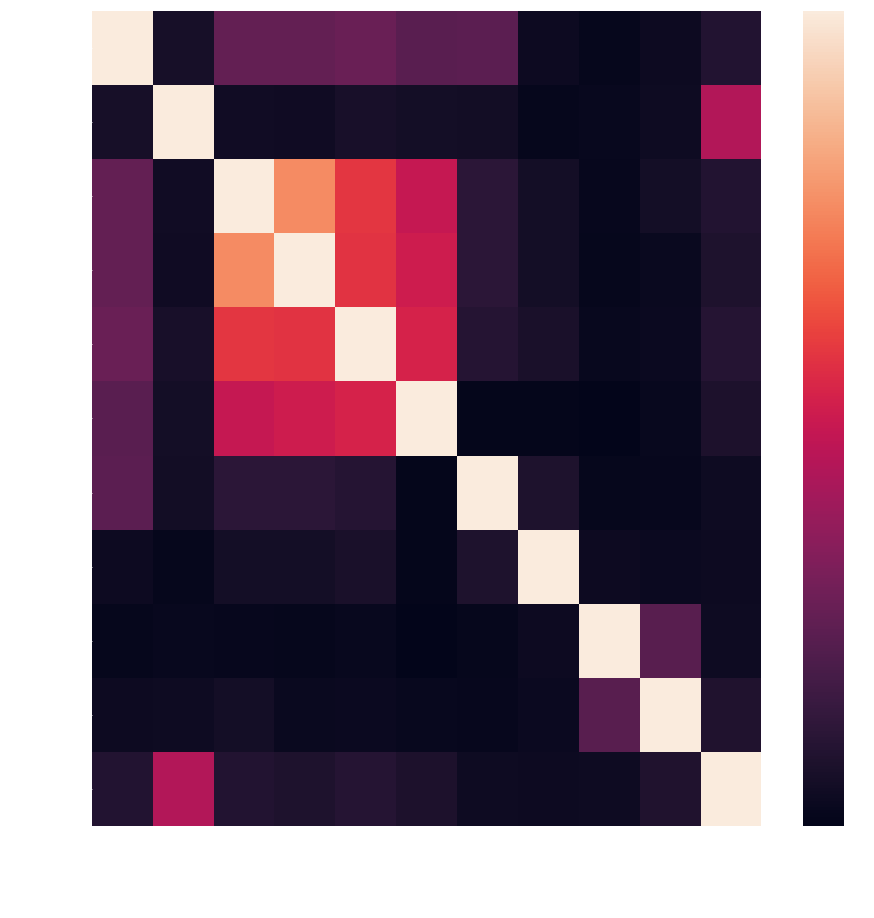

In [7]:
fit, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(res.corr(), ax=ax)

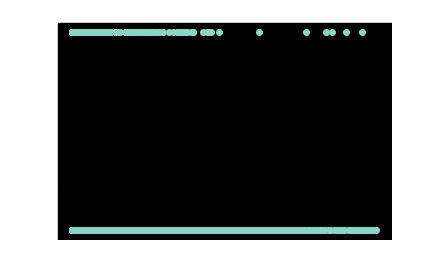

In [9]:
df_plt = tmp.groupby(['utm_source'])['target_event'].mean().to_frame().reset_index()

plt.figure()
plt.scatter(tmp['utm_source'], tmp['target_event'])
plt.title("Зависимость целевого действия от использования соцсетей")
plt.xlabel('Использование соцсетей')
plt.ylabel('Целевое действие')

plt.show();